## before

In [1]:
prob = 50

import math
import pandas as pd
df1 = pd.read_csv(str(prob) + '.csv')

# 开始概率
beginw = 0
for i in range(len(df1.index.values)-3):
    beginw += df1['w'][i]

sumw1 = 0 # ！权重
sumw2 = 0 # = 权重
sumw3 = 0
w1 = [] # 存放 ！权重的列表
w2 = [] # 存放 = 权重的列表
w3 = []# 存放 2.5比特约束权重列表
for i in df1.columns.values[4:-2]: # i列名，不包括前两列
    for j in range(len(df1[i][:-3])): # j行数，不包括后3行
        if df1[i][j] == '!':
            sumw1 += df1['w'][j]
        elif df1[i][j] == '=':
            sumw2 += df1['w'][j]
        elif (not (pd.isnull(df1[i][j]))) and len(str(df1[i][j])) > 6:
            sumw3 += df1['w'][j]
    w1.append((sumw1/beginw)*100)
    w2.append((sumw2/beginw)*100)
    w3.append((sumw3/beginw)*100)
    sumw1 = 0
    sumw2 = 0
    sumw3 = 0
print(w1)
print(w2)
print(w3)

[0.0, 0.0, 0.0, 0.011415585725739225, 0.005575053493965669, 0.041680161835838565, 6.282288851485884, 0.0003982181067118335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002123829902463112, 0.01619420300628123, 0.2908319572685424, 1.2413785779896889, 0.7992237401706497, 0.0014601330579433892, 0.014601330579433892, 0.0, 0.0, 0.0006636968445197224, 0.028008006838732287, 3.057916841440169, 0.0003982181067118335, 0.004513138542734113, 0.0, 0.0, 0.012875718783682617, 0.4708265415022911, 3.1126054614285943, 0.28100924396965044, 4.185803259016986, 4.156733337227021, 0.0, 0.0, 0.0003982181067118335, 41.27305019141017, 2.988494151503406, 0.3168488735737155, 1.0556762008930705, 0.0, 0.0, 0.0, 15.686607659592545, 2.150245036874997, 0.024689522616133674, 5.312760501011474, 0.0026547873780788894, 0.0, 0.0, 0.001061914951231556, 0.29946001624729873, 1.7751235803524494, 2.106441045136695, 2.74465193082686, 0.07951088197346275, 0.0, 0.0, 0.0, 0.2644168228566574, 13.392871364932383, 0.0, 0.0, 0.0, 0.0

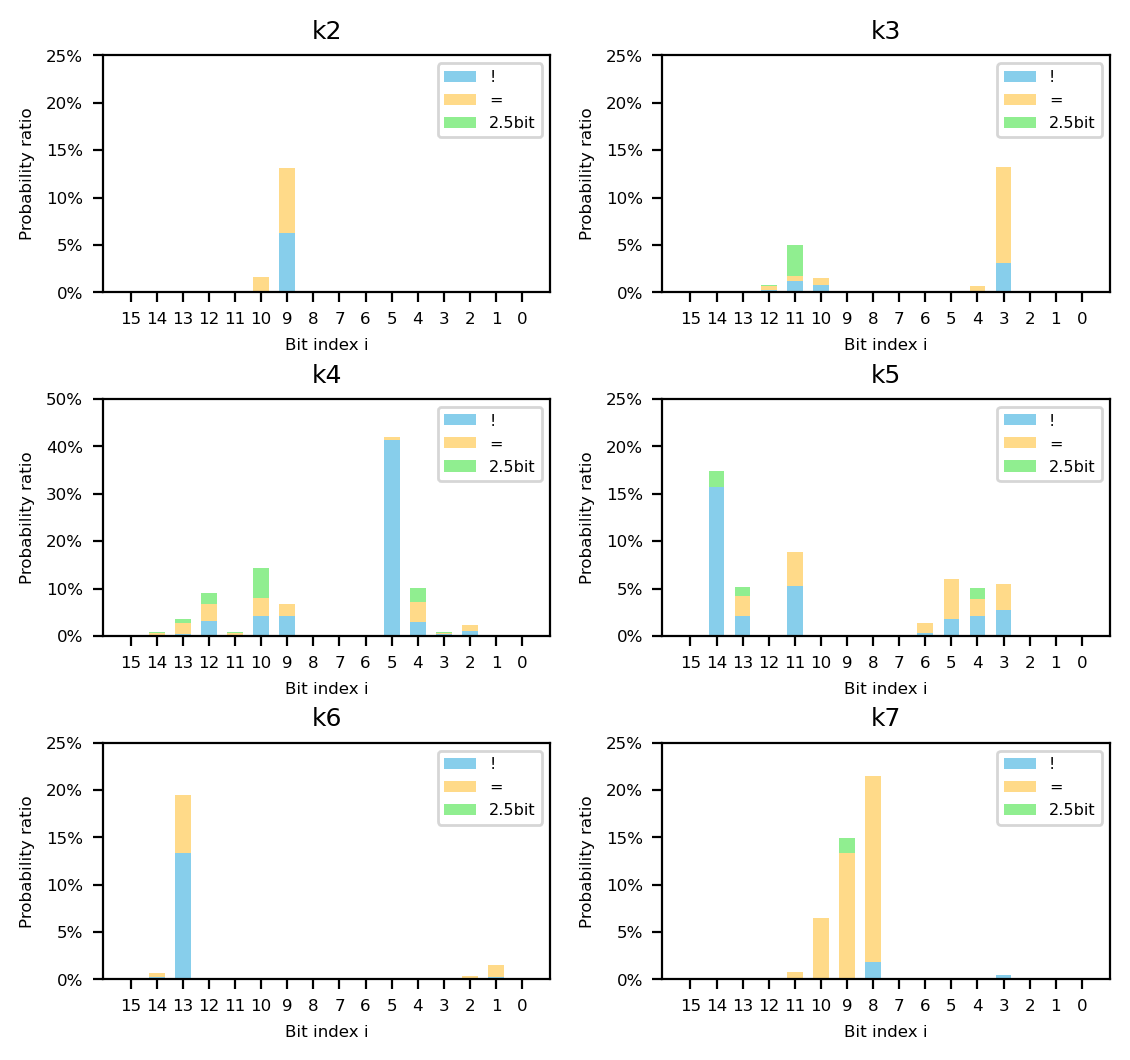

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def to_percent(temp, position):
    return '%1.0f'%(1*temp) + '%'

j = 0
plt.figure(figsize=(6.5,6), dpi=200)
for i in range(0,6,1):    
    plt.subplot(3,2,i+1)

    # 包含每个柱子对应值的序列
    values = w1[j:j+16]
    values2 = w2[j:j+16]
    values3 = w3[j:j+16]
    j+=16

    # 柱子的宽度
    width = 0.6
    
    # 绘制柱状图
    index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    p1 = plt.bar(index, values, width, label="!", color="skyblue")
    p2 = plt.bar(index, values2, width, label="=", color="#FFDA89", bottom=values)
    p3 = plt.bar(index, values3, width, label="2.5bit", color="lightgreen", bottom=np.array(values)+np.array(values2))
#     p4 = plt.bar(index, values4, width, label="-", color="#00FF00", bottom=values3)

    # 设置横轴标签
    plt.xlabel('Bit index i',size=6)
    # 设置纵轴标签
    plt.ylabel('Probability ratio',size=6)

    # 添加标题
    plt.title('k' + str(i+2),size=9)

    # 添加纵横轴的刻度
    plt.xticks(index, ('15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'),size=6)
    if i == 2:
        plt.yticks(np.arange(0, 60, 10),size=6)
    else:
        plt.yticks(np.arange(0, 30, 5),size=6)

    # 添加图例
    plt.legend(loc="best",fontsize="xx-small")

    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.45)
plt.savefig(fname="before2.svg", format="svg")
plt.show()

## after

In [15]:
prob = 50

import math
import pandas as pd
df2 = pd.read_csv(str(prob) + 'all.csv') # 不需要删除第一列

# 开始概率
beginw2 = 0
for i in range(len(df2.index.values)-10):
    beginw2 += df2['w'][i]

sumw12 = 0 # ！权重
sumw22 = 0 # = 权重
sumw32 = 0
w12 = [] # 存放 ！权重的列表
w22 = [] # 存放 = 权重的列表
w32 = []# 存放 2.5比特约束权重列表
for i in df2.columns.values[5:-2]: # i列名，不包括前三列
    for j in range(len(df2[i][:-10])): # j行数，不包括后3行
        if df2[i][j] == '!':
            sumw12 += df2['w'][j]
        elif df2[i][j] == '=':
            sumw22 += df2['w'][j]
        elif (not (pd.isnull(df2[i][j]))) and len(str(df2[i][j])) > 6:
            sumw32 += df2['w'][j]
    w12.append((sumw12/beginw2)*100)
    w22.append((sumw22/beginw2)*100)
    w32.append((sumw32/beginw2)*100)
    sumw12 = 0
    sumw22 = 0
    sumw32 = 0
print(w12)
print(w22)
print(w32)

[0.0, 0.0, 0.0, 0.0016555978127187755, 0.0, 0.0, 0.0, 0.0007095419197366181, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2469016669504835, 0.7145087131747744, 0.002601653705700933, 0.024124425271045014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007095419197366181, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.609856010293089, 2.936557491816617, 0.0, 0.0, 0.0, 40.96965998751207, 4.739740023840609, 0.0, 0.0, 0.0, 0.0, 0.0, 9.202522185010691, 2.802927096932887, 0.0, 4.210658265690337, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.43797657565609, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006149363304384022, 0.02175928553858962, 0.0014190838394732362, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6085504531607727, 0.013008268528504665, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.1166013888100509, 1.862074511362131, 7.573886965241907, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009460558929821574, 0.0, 0.0, 0.0023651397324553937, 0.12795405952583677, 0.2710450133393

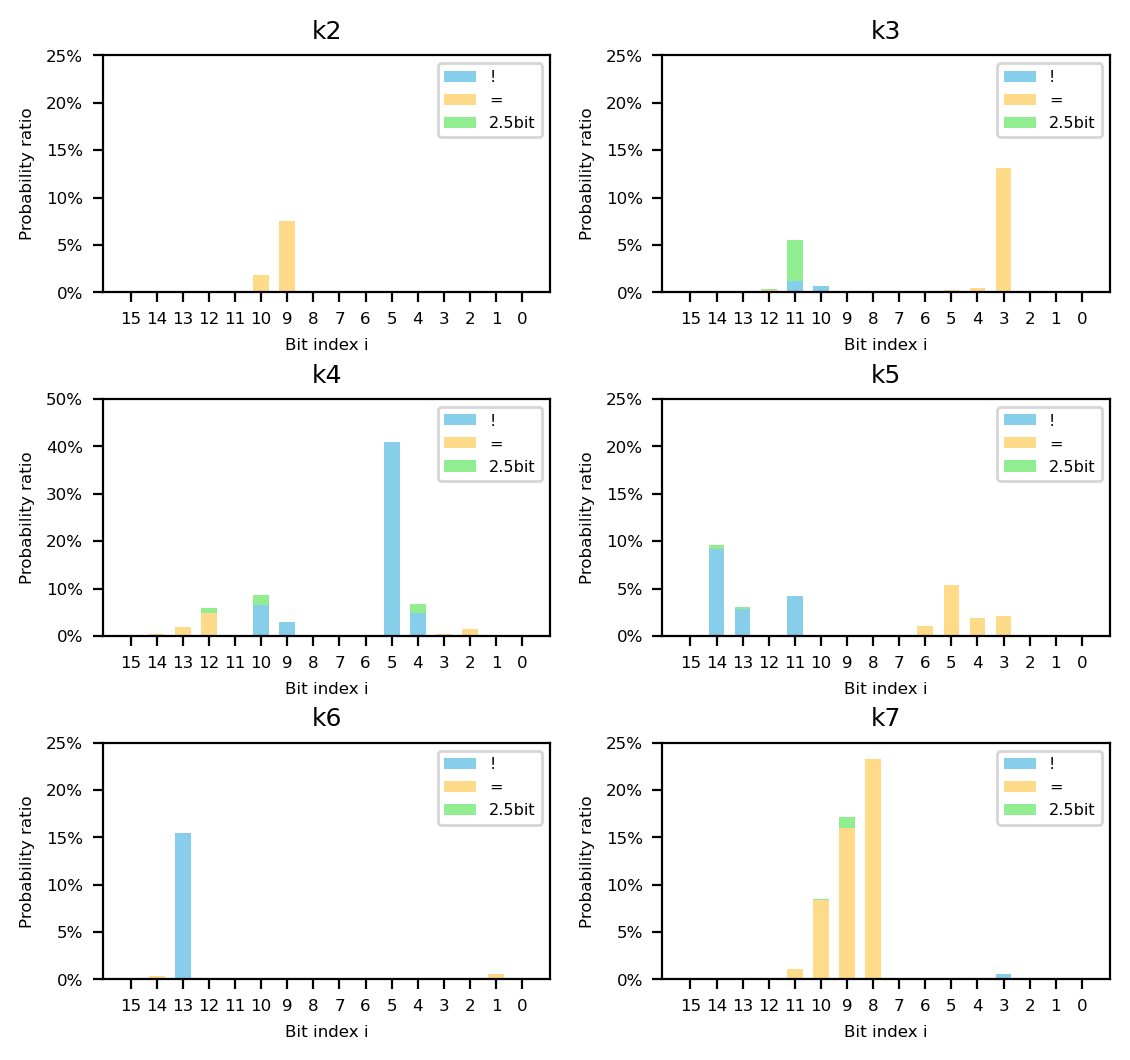

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def to_percent(temp, position):
    return '%1.0f'%(1*temp) + '%'

j = 0
plt.figure(figsize=(6.5,6), dpi=200)
for i in range(0,6,1):    
    plt.subplot(3,2,i+1)

    # 包含每个柱子对应值的序列
    values12 = w12[j:j+16]
    values22 = w22[j:j+16]
    values32 = w32[j:j+16]
    j+=16

    # 柱子的宽度
    width = 0.6

    # 绘制柱状图
    index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    p1 = plt.bar(index, values12, width, label="!", color="skyblue")
    p2 = plt.bar(index, values22, width, label="=", color="#FFDA89", bottom=values12)
    p3 = plt.bar(index, values32, width, label="2.5bit", color="lightgreen", bottom=np.array(values12)+np.array(values22))

    # 设置横轴标签
    plt.xlabel('Bit index i',size=6)
    # 设置纵轴标签
    plt.ylabel('Probability ratio',size=6)

    # 添加标题
    plt.title('k' + str(i+2),size=9)

    # 添加纵横轴的刻度
    plt.xticks(index, ('15','14','13','12','11','10','9','8','7','6','5','4','3','2','1','0'),size=6)
    if i == 2:
        plt.yticks(np.arange(0, 60, 10),size=6)
    else:
        plt.yticks(np.arange(0, 30, 5),size=6)

    # 添加图例
    plt.legend(loc="best",fontsize="xx-small")

    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.45)
plt.savefig(fname="after2.svg", format="svg")
plt.show()